In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
#from keras.layers import Input, Dense
#from keras.models import Model
#from keras import regularizers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load, prepare and inspect the datasets

In [2]:
df =pd.read_csv("diabetes.csv")


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# columwise sum of all na values
import numpy as np

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# columnwise sum of all nul values
import numpy as np

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df['Outcome'].mean()
clas_std = df['Outcome'].std()
df['z-score'] = (df['Outcome']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df[df['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df)*100
percent_values_plus_minus_one_z_score

65.10416666666666

In [8]:
#Other way of Checking imbalance of data
target_count=df.Outcome.value_counts()
print(target_count)

imbalance_target=(target_count[0]/(target_count[1]+target_count[0]))*100
print(imbalance_target)

0    500
1    268
Name: Outcome, dtype: int64
65.10416666666666


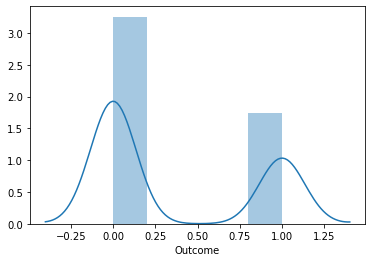

In [9]:
import seaborn as sns

sns.distplot(df['Outcome'])


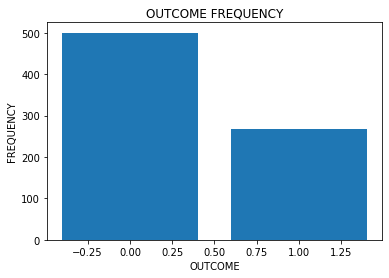

In [10]:
import numpy as np
import matplotlib.pyplot as plt

classes = df['Outcome'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('OUTCOME FREQUENCY')
plt.xlabel('OUTCOME')
plt.ylabel('FREQUENCY')
plt.show()

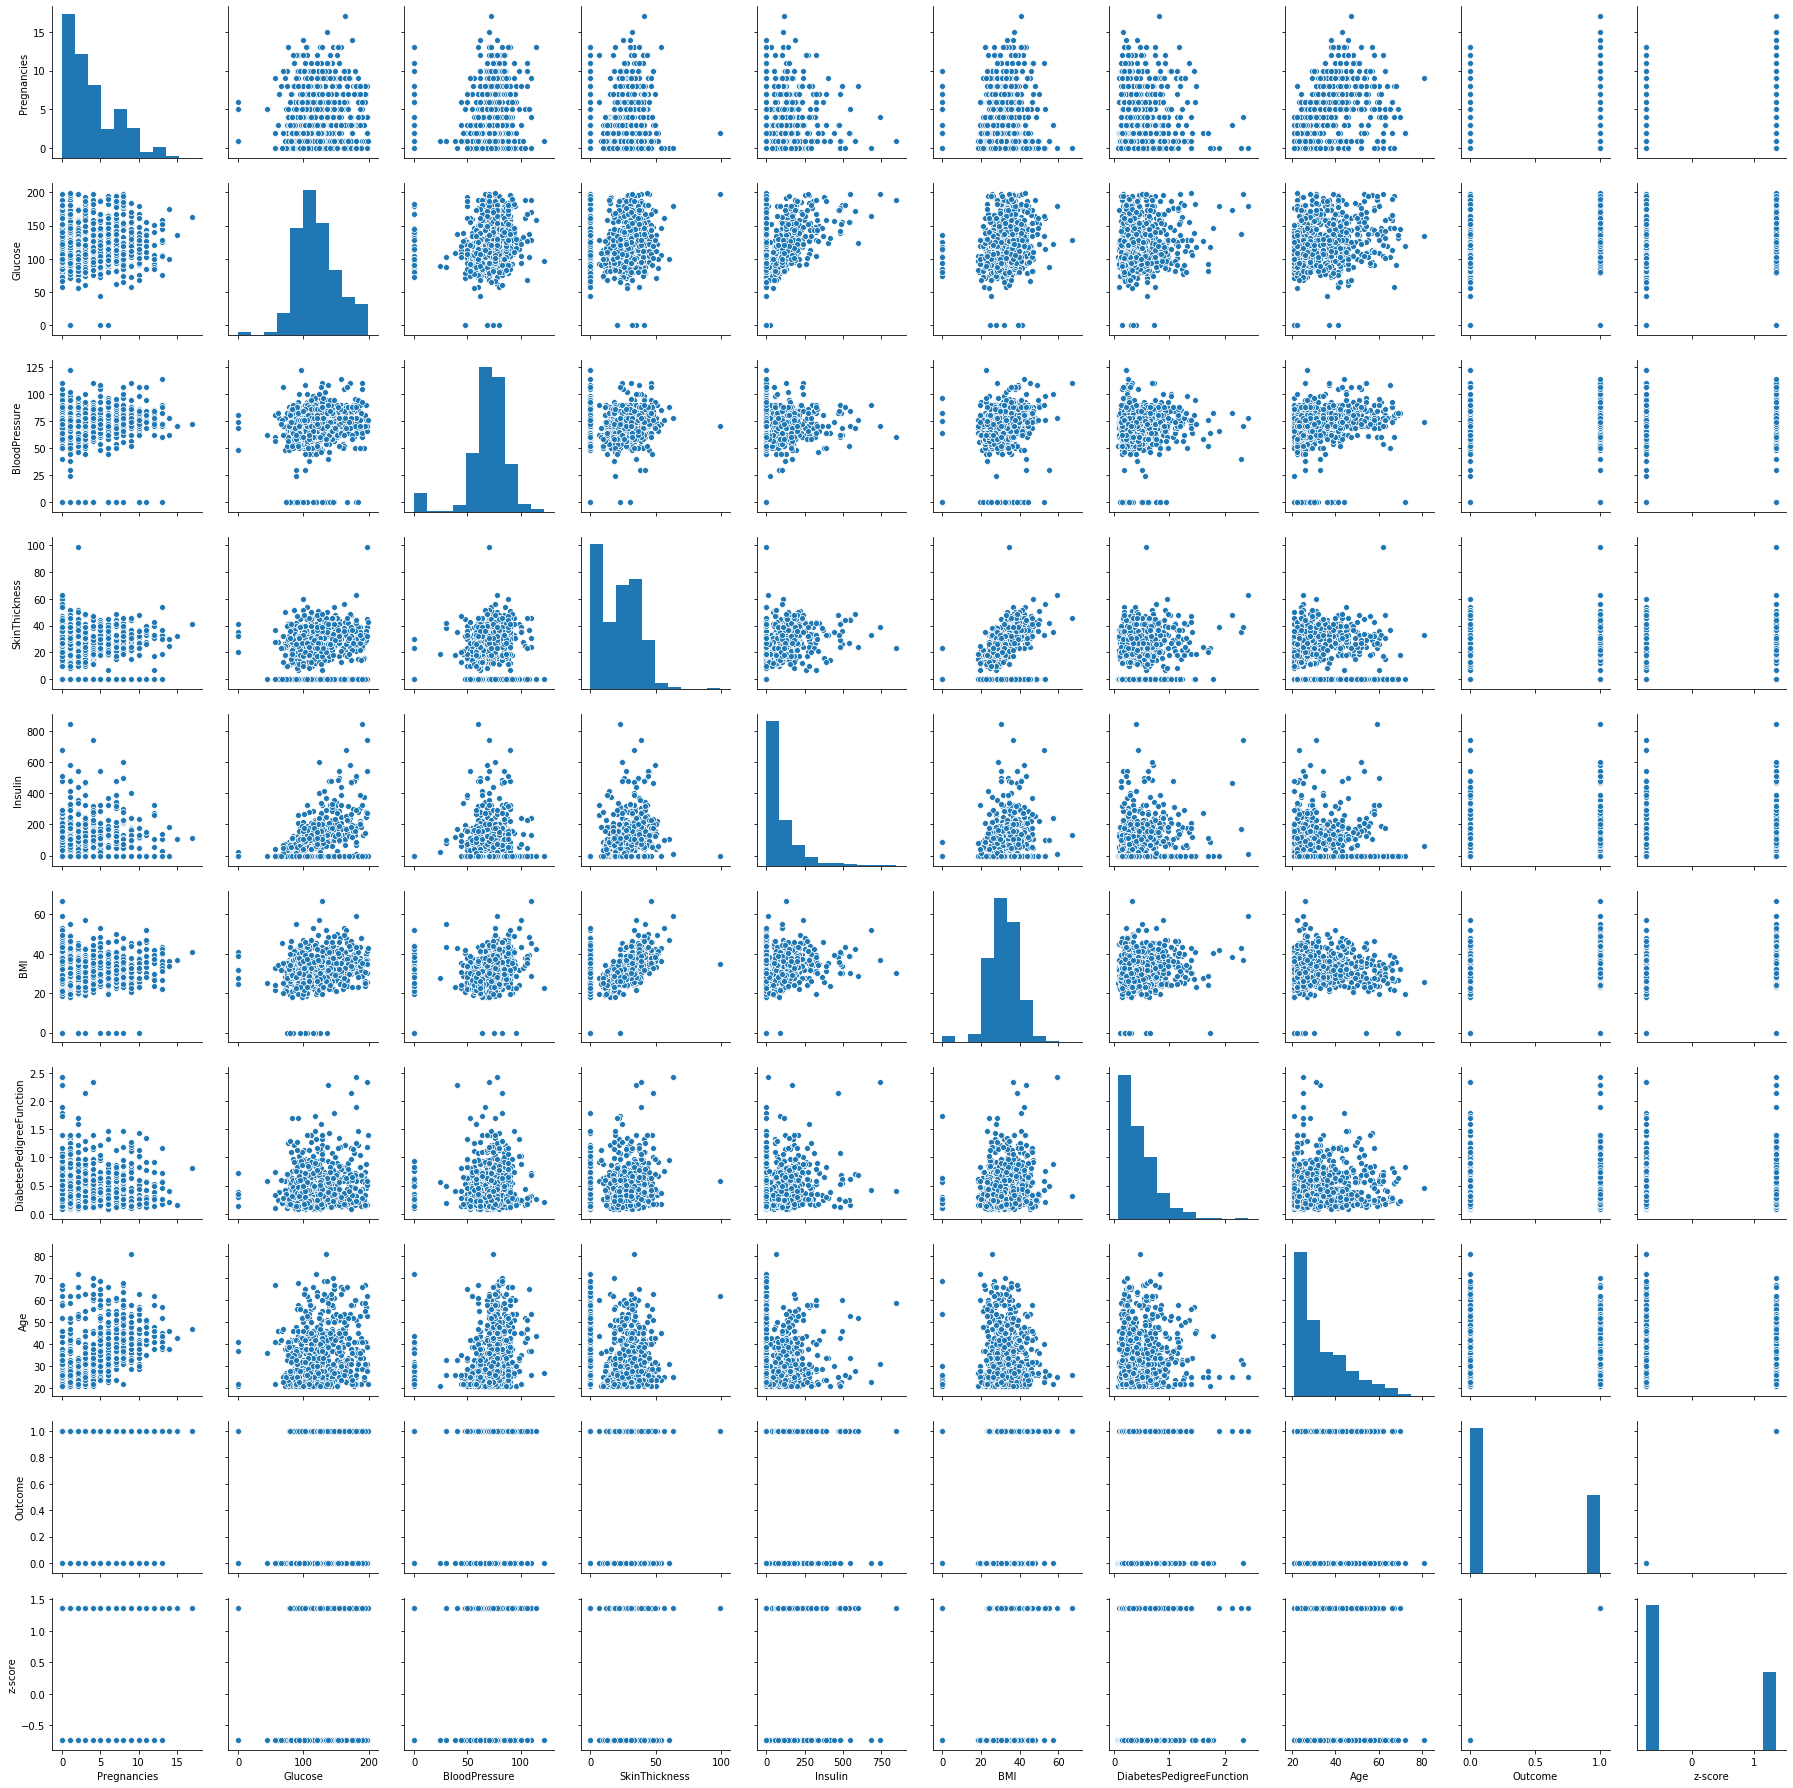

In [11]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F930F77F48>,
      dtype=object)

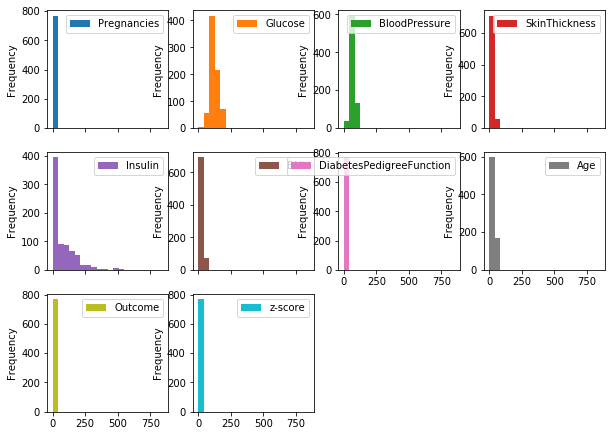

In [12]:
df.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=20)

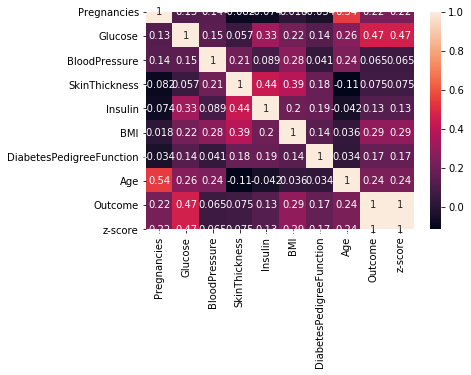

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'z-score'],
      dtype='object')

In [15]:
#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["BMI"]] = df[["BMI"]].apply(LabelEncoder().fit_transform)
df[["DiabetesPedigreeFunction"]] = df[["DiabetesPedigreeFunction"]].apply(LabelEncoder().fit_transform)
df[["Pregnancies"]] = df[["Pregnancies"]].apply(LabelEncoder().fit_transform)
df[["Glucose"]] = df[["Glucose"]].apply(LabelEncoder().fit_transform)
df[["SkinThickness"]] = df[["SkinThickness"]].apply(LabelEncoder().fit_transform)
df[["Insulin"]] = df[["Insulin"]].apply(LabelEncoder().fit_transform)
df[["Age"]] = df[["Age"]].apply(LabelEncoder().fit_transform)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z-score
0,6,86,72,28,0,123,350,29,1,1.365006
1,1,23,66,22,0,62,196,10,0,-0.731643
2,8,121,64,0,0,30,368,11,1,1.365006
3,1,27,66,16,62,77,53,0,0,-0.731643
4,0,75,40,28,102,209,514,12,1,1.365006


In [18]:
X=df.iloc[:,1:len(df.columns)-2]
y=df.iloc[:,len(df.columns)-2:len(df.columns)-1]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z-score
0,6,86,72,28,0,123,350,29,1,1.365006
1,1,23,66,22,0,62,196,10,0,-0.731643
2,8,121,64,0,0,30,368,11,1,1.365006
3,1,27,66,16,62,77,53,0,0,-0.731643
4,0,75,40,28,102,209,514,12,1,1.365006
...,...,...,...,...,...,...,...,...,...,...
763,10,39,76,41,108,118,55,42,0,-0.731643
764,2,60,70,20,0,155,187,6,0,-0.731643
765,5,59,72,16,71,58,115,9,0,-0.731643
766,1,64,60,0,0,95,195,26,1,1.365006


# Cross-validation on your dataset using a decision tree 

-- 10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.00400186, 0.00400543, 0.00400257, 0.00400162, 0.00400186,
       0.00300193, 0.00300241, 0.00300145, 0.004004  , 0.00399971]), 'score_time': array([0.00200129, 0.00200009, 0.00200033, 0.00200129, 0.00200105,
       0.00100088, 0.00100064, 0.00100017, 0.00200081, 0.00100279]), 'test_score': array([0.6875    , 0.75      , 0.8125    , 0.6875    , 0.73333333,
       0.73333333, 0.66666667, 0.73333333, 0.8       , 0.6       ])}
Accuracy mean is: 0.7204166666666666
              precision    recall  f1-score   support

           0       0.71      0.96      0.81       102
           1       0.73      0.21      0.33        52

    accuracy                           0.71       154
   macro avg       0.72      0.59      0.57       154
weighted avg       0.71      0.71      0.65       154



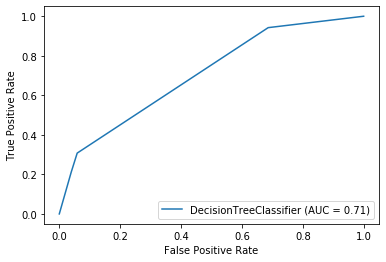

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

# Cross-validation on your dataset using a random forest

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


All RF scores: 
{'fit_time': array([0.15110946, 0.13509417, 0.13309503, 0.13509655, 0.13609624,
       0.19713902, 0.20765185, 0.15410924, 0.13309479, 0.11208034]), 'score_time': array([0.01000714, 0.01501012, 0.01601076, 0.01200771, 0.01401043,
       0.02001429, 0.01400995, 0.01300883, 0.01400924, 0.01400971]), 'test_score': array([0.625     , 0.8125    , 0.625     , 0.8125    , 0.73333333,
       0.73333333, 0.73333333, 0.8       , 0.86666667, 0.8       ])}
Accuracy mean is: 0.7541666666666667
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       102
           1       0.75      0.58      0.65        52

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



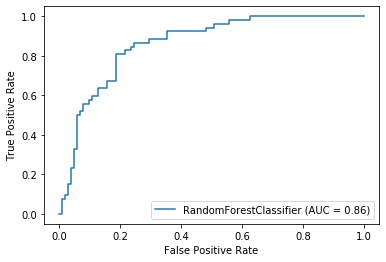

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


#Partition the datasets into 10 bins keeping the imbalance ratio from the original dataset

In [21]:

from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0=df[df['Outcome']==0]
df_class1=df[df['Outcome']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
orig_imbalance=(target_count[0]/(target_count[1]+target_count[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.Outcome.value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df.columns

X_train=data.iloc[:,1:9]
y_train=data.iloc[:,9:11]
X_test=curr_bin.iloc[:,1:9]
y_test=curr_bin.iloc[:,9:11]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 65.10416666666666 %
Class imbalance ratio in bin 0 : 65.78947368421053 %
Class imbalance ratio in bin 1 : 65.78947368421053 %
Class imbalance ratio in bin 2 : 65.78947368421053 %
Class imbalance ratio in bin 3 : 65.78947368421053 %
Class imbalance ratio in bin 4 : 65.78947368421053 %
Class imbalance ratio in bin 5 : 65.78947368421053 %
Class imbalance ratio in bin 6 : 65.78947368421053 %
Class imbalance ratio in bin 7 : 65.78947368421053 %
Class imbalance ratio in bin 8 : 65.78947368421053 %
Class imbalance ratio in bin 9 : 65.78947368421053 %


C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


#Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.


silhouette 2th score:0.382817 
Distortion or average SSE for 2th cluster is:1.343752 
silhouette 3th score:0.403248 
Distortion or average SSE for 3th cluster is:1.080145 
silhouette 4th score:0.389296 
Distortion or average SSE for 4th cluster is:0.913613 
silhouette 5th score:0.379721 
Distortion or average SSE for 5th cluster is:0.826668 
silhouette 6th score:0.355735 
Distortion or average SSE for 6th cluster is:0.760776 
silhouette 7th score:0.362377 
Distortion or average SSE for 7th cluster is:0.705117 
silhouette 8th score:0.356888 
Distortion or average SSE for 8th cluster is:0.665431 
silhouette 9th score:0.354562 
Distortion or average SSE for 9th cluster is:0.629249 


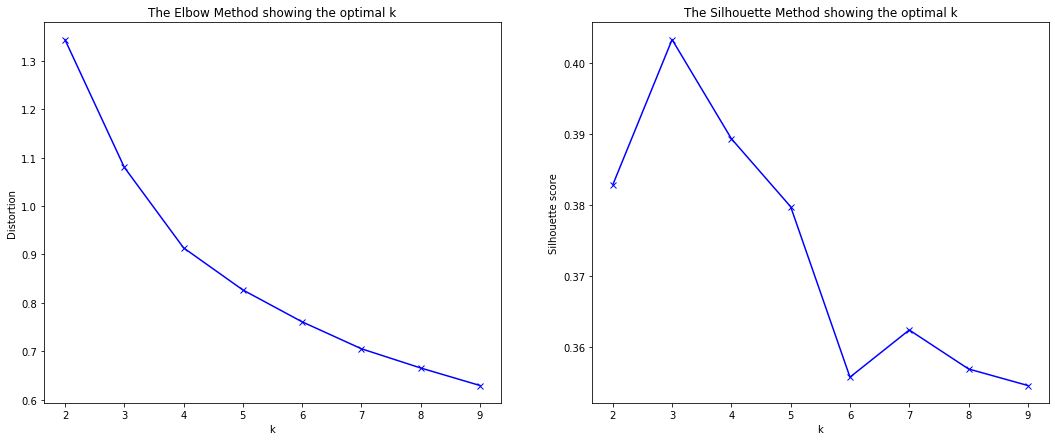

In [22]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
silhouette_scores=[]
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_pca, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))


# Plot the elbow
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


#Further Analysis on K with Silhouette Method

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3828166077214913
For n_clusters = 3 The average silhouette_score is : 0.40324808401144446
For n_clusters = 4 The average silhouette_score is : 0.38929585087380386
For n_clusters = 5 The average silhouette_score is : 0.37958590262992115
For n_clusters = 6 The average silhouette_score is : 0.35700778541391376
For n_clusters = 7 The average silhouette_score is : 0.3616520209017715
For n_clusters = 8 The average silhouette_score is : 0.35556832830006607


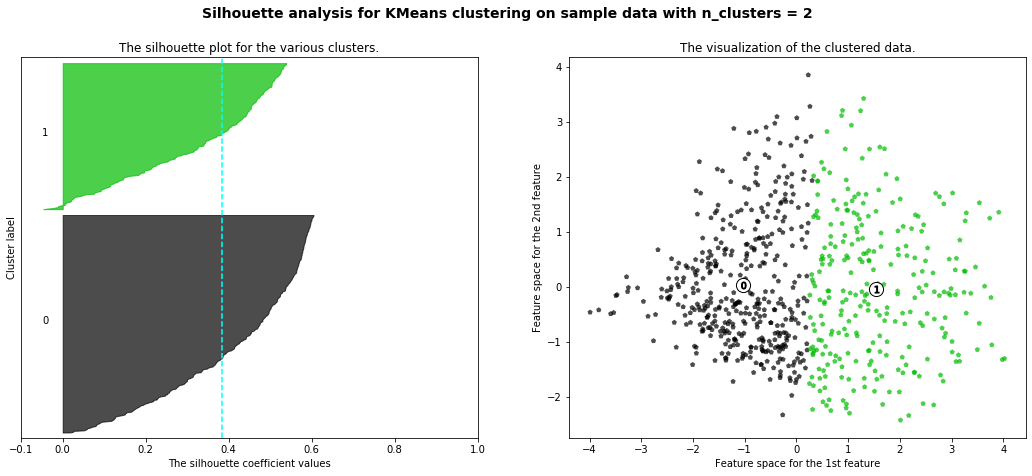

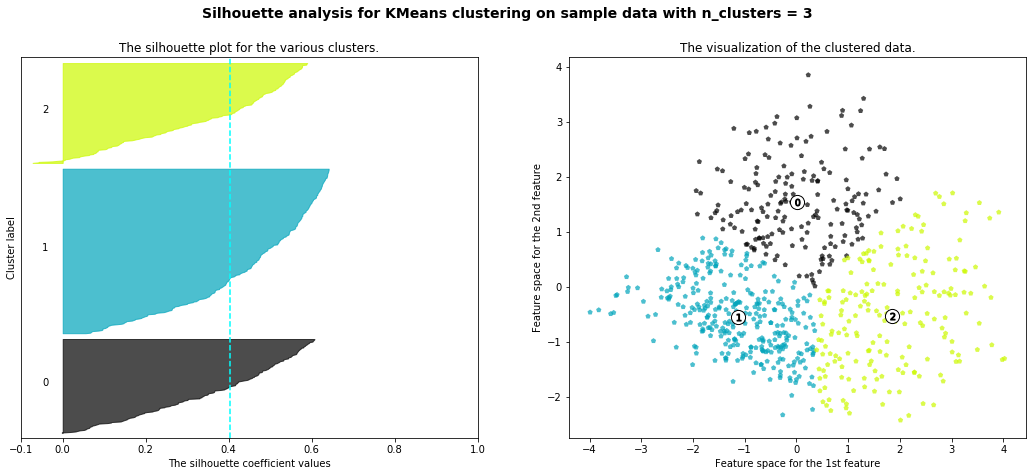

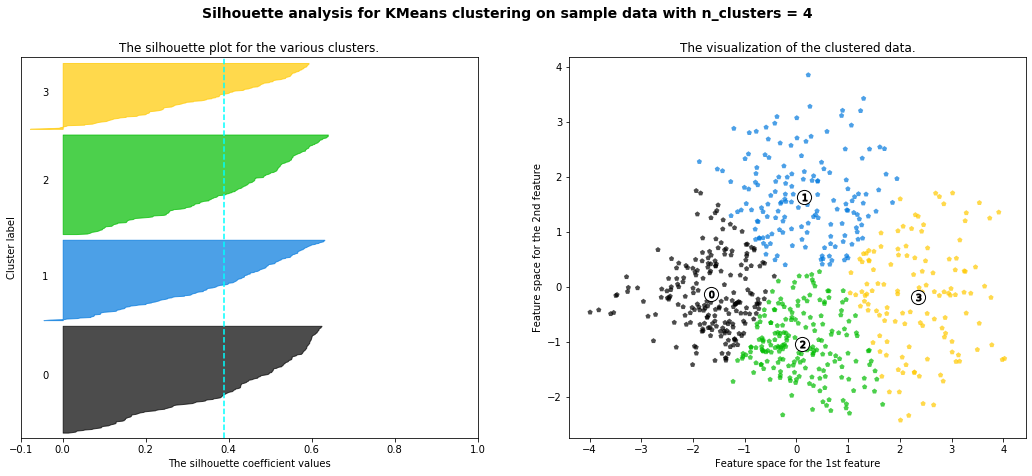

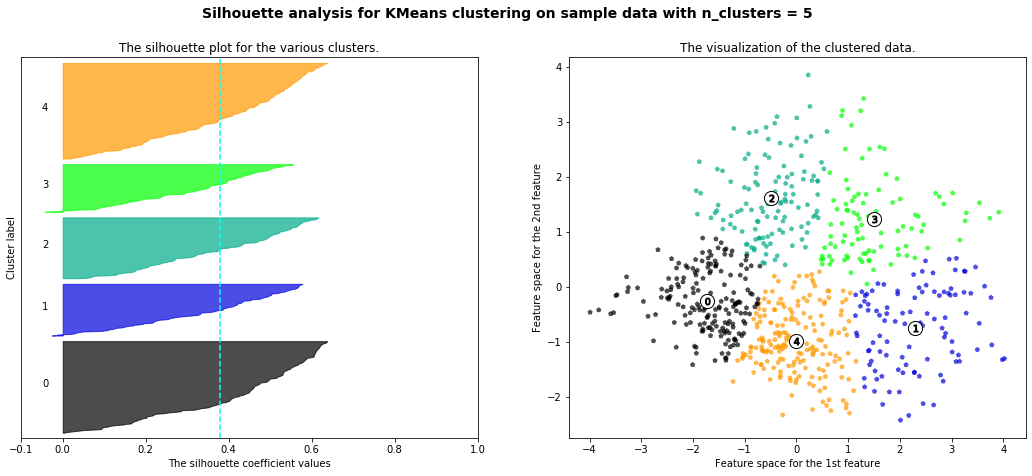

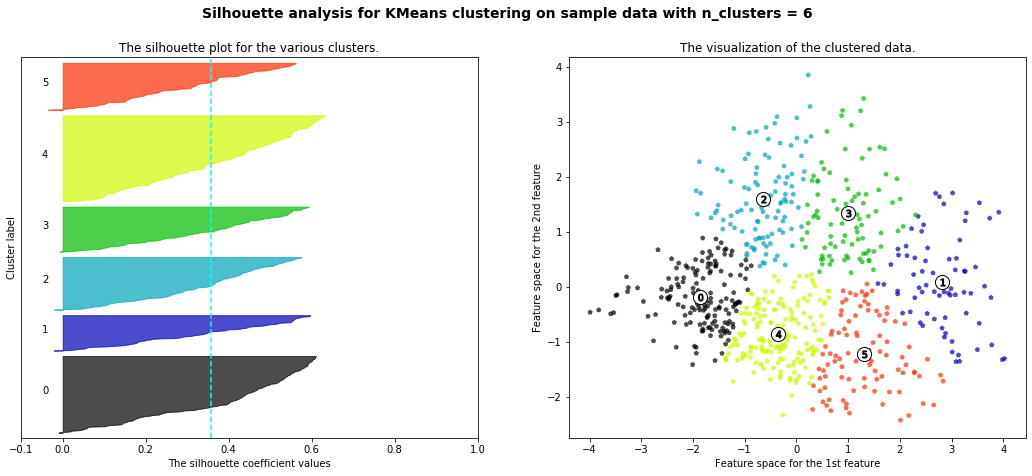

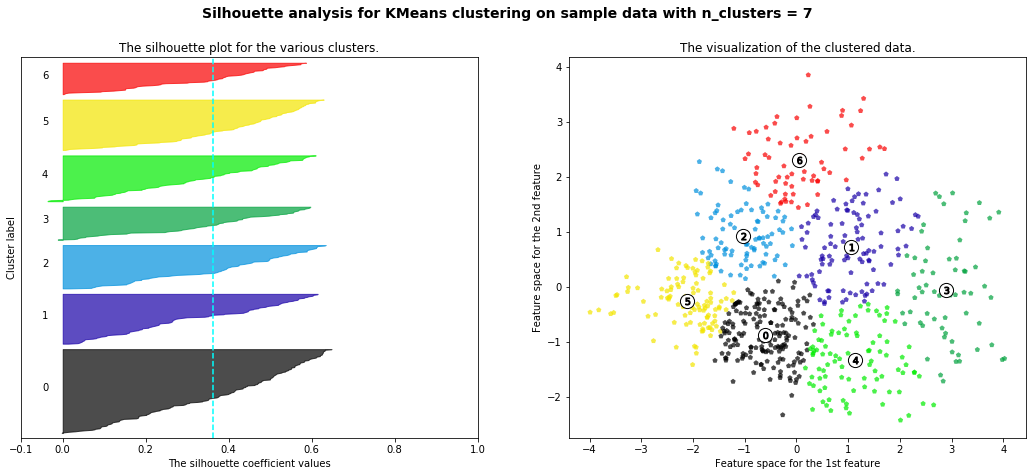

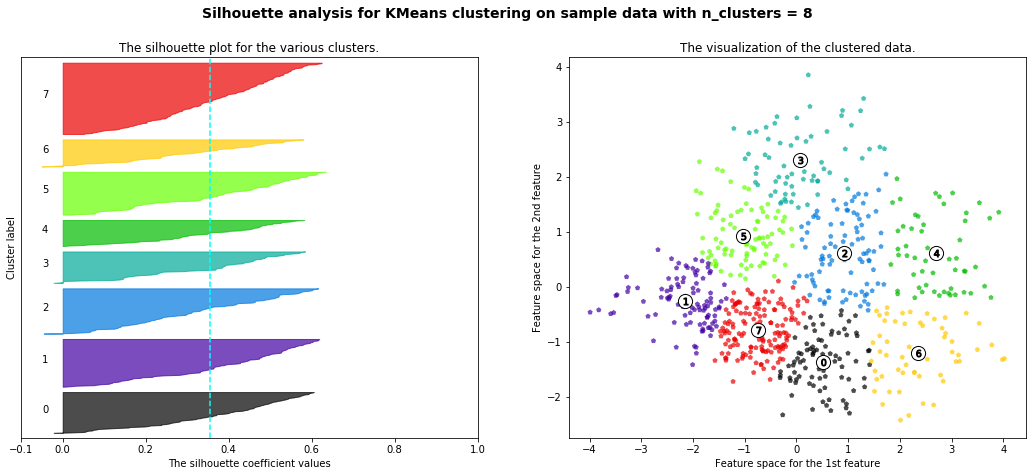

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="cyan", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Run k-means in the data set using the identified number of clusters.

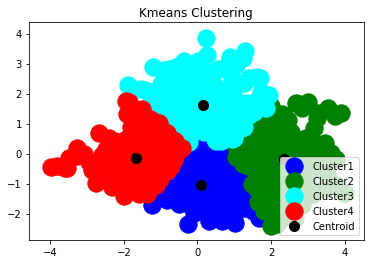

In [25]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'blue', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'green', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'cyan', label = 'Cluster3')
plt.scatter(X_train_pca[y_kmeans == 3, 0], X_train_pca[y_kmeans == 3, 1], s = 300, c = 'red', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

#For each cluster identify its centroid and the number of samples of the minority class in that cluster

In [26]:
cluster_data["Cluster label"]=kmeans.labels_

#cluster_data["Centroid"]=kmeans.cluster_centers_
cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['Outcome']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['Outcome']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-1.6557378589283314, -0.13713878921751094]",3,8,199
1,"[0.1530742423638668, 1.6258098321858985]",2,101,55
2,"[0.09826588388828952, -1.0424003984654753]",0,20,173
3,"[2.3429128078043857, -0.18793224647764564]",1,105,23


#Train a random forest for each of the clusters that contains samples from more than one class

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mean of score for Random Forest Tree is:0.723


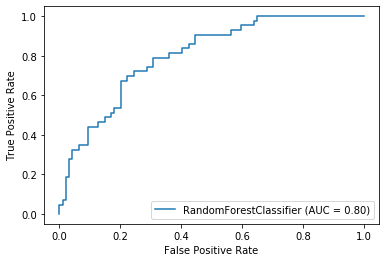

In [27]:
from sklearn.metrics import accuracy_score as acc

Two_cls_info=cluster_info[(cluster_info['Min_cls1_cnt_clusterwise']>0) & (cluster_info['Maj_cls0_cnt_clusterwise']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=cluster_data[cluster_data['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

rf_clf =RandomForestClassifier(n_estimators=100, min_samples_split=20,
                                random_state=8)
rf_score=[]

X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:len(Two_cls_data.columns)-3], Two_cls_data.iloc[:,len(Two_cls_data.columns)-3:len(Two_cls_data.columns)-2], test_size=0.2)

rf_clf.fit(X_train,y_train)
yrf_pred=rf_clf.predict(X_test)
y_true=y_test
rf_score.append(acc(y_true,yrf_pred))
print("mean of score for Random Forest Tree is:{:.3f}".format(mean(rf_score)) )

plot_roc_curve(rf_clf, X_test, y_test)
plt.show()


#Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label


In [28]:


#If cluster has only one instance of class then label will be that class itself
cluster_info['new_label']=np.where(cluster_info['Maj_cls0_cnt_clusterwise']>cluster_info['Min_cls1_cnt_clusterwise'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

cluster_info_new=cluster_info
n_clusters=4
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=cluster_info_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)



#Second method to find out cluster label of left out fold

In [29]:
def cluster_2_label(alpha):
    if alpha == 0:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 1:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 2:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 3:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 4:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 5:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 6:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 7:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])

predict=kmeans.fit_predict(X_test_pca)
labels_2 = predict
curr_bin['cluster_label']=labels_2
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_2_label)

print(predict)
#curr_bin = curr_bin.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
print(pd.crosstab(curr_bin['Outcome'],curr_bin['class_label']))
print("Accuracy of defining class label: " ,acc(curr_bin['class_label'],curr_bin['Outcome']))
#curr_bin

[1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 2 0 1 1 0 1 0 0 2 0 0 0 1 1 0 1 1 0 1 0 1 1
 3 0 0 0 1 2 1 1 1 0 0 1 1 3 2 3 2 3 3 2 2 2 1 2 0 2 3 3 2 2 2 2 3 2 3 2 3
 3 2]
class_label   0   1
Outcome            
0            24  26
1            11  15
Accuracy of defining class label:  0.5131578947368421


#DT and RF model with 10 bin

Scores for stratified Decision Tree are:
[0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053]
Scores for stratified Random Forest Tree are:
[0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053]
Average Accuracy for Decision Tree: 0.66 +/- 0.00
AverageAccuracy for RF Tree: 0.66 +/- 0.00
classification_report for Decision Tree is:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        50
           1       0.00      0.00      0.00        26

    accuracy                           0.66        76
   macro avg       0.33      0.50      0.40        76
weighted avg       0.43      0.66      0.52        76

classification_report for Random Forest Tree is

C:\Users\Pankaj Raut\harsha\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


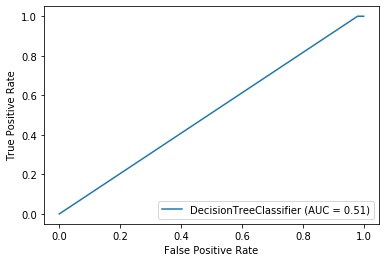

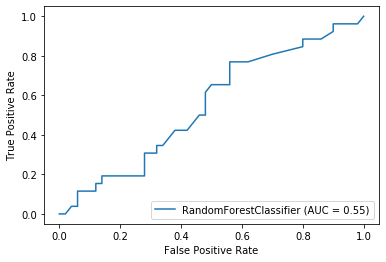

In [30]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA



rf_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=20,
                                random_state=10)
dt_clf=DecisionTreeClassifier(min_samples_split=20,max_depth=8,
                                random_state=10)
new_rf_score=[]
new_dt_score=[]

init0=0
init1=0

for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)


#Scaling and PCA for current bin
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=X.iloc[i:-1]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=y.iloc[i:-1]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-2:len(curr_bin.columns)-1]

#Fitting both model for current bin    
    dt_clf.fit(X_train_pca,y_train.values.ravel())
    rf_clf.fit(X_train_pca,y_train.values.ravel())

#predicting for testing
    yrf_pred=rf_clf.predict(X_test_bin_pca)
    ydt_pred=dt_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_dt_score.append(acc(y_true,ydt_pred))
    new_rf_score.append(acc(y_true,yrf_pred)) 

print("Scores for stratified Decision Tree are:")
print(new_dt_score)
print("Scores for stratified Random Forest Tree are:")
print(new_rf_score)

print("Average Accuracy for Decision Tree: %0.2f +/- %0.2f" % (mean(new_dt_score), np.std(new_dt_score)))
print("AverageAccuracy for RF Tree: %0.2f +/- %0.2f" % (mean(new_rf_score), np.std(new_rf_score)))


#Result
print("classification_report for Decision Tree is:")

print(classification_report(y_true, ydt_pred))

print("classification_report for Random Forest Tree is:")

print(classification_report(y_true, yrf_pred))

plot_roc_curve(dt_clf, X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

plot_roc_curve(rf_clf,X_test_bin_pca, y_test_bin.values.ravel())
plt.show()


#Permutation on results and Accuracies metrics

In [31]:
#Decision Tree results:
print("Baseline Decision Tree method accuries:")
print(old_dt_scores['test_score'])

print("\n Baseline Decision Tree method accuries mean:")
print(mean(old_dt_scores['test_score']))

print("\n New method Decision Tree accuries:")
print(new_dt_score) 

print("\n New method Decision Tree accuries mean:")
print(mean(new_dt_score)) 

tobs=mean(new_dt_score)-mean(old_dt_scores['test_score'])

dt_concat = np.concatenate((old_dt_scores['test_score'],new_dt_score))

count=0
for i in range(2000):
  perm = np.random.permutation(dt_concat)
  pcurr = perm[:len(old_dt_scores['test_score'])]
  pnew = perm[:len(new_dt_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Decision Tree p-value :",p)



#Random Forest Tree results:
print("Baseline Random Forest Tree method accuries:")
print(old_rf_scores['test_score'])

print("\n Baseline Random Forest Tree method accuries mean:")
print(mean(old_rf_scores['test_score']))

print("\n New method Random Forest Tree accuries:")
print(new_rf_score)


print("\n New method Random Forest Tree accuries mean:")
print(mean(new_rf_score)) 

tobs=mean(new_rf_score)-mean(old_rf_scores['test_score'])

rf_concat = np.concatenate((old_rf_scores['test_score'],new_rf_score))

count=0
for i in range(2000):
  perm = np.random.permutation(rf_concat)
  pcurr = perm[:len(old_rf_scores['test_score'])]
  pnew = perm[:len(new_rf_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Random Forest Tree p-value :",p)


Baseline Decision Tree method accuries:
[0.6875     0.75       0.8125     0.6875     0.73333333 0.73333333
 0.66666667 0.73333333 0.8        0.6       ]

 Baseline Decision Tree method accuries mean:
0.7204166666666667

 New method Decision Tree accuries:
[0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053]

 New method Decision Tree accuries mean:
0.6578947368421053
Decision Tree p-value : 1.0
Baseline Random Forest Tree method accuries:
[0.625      0.8125     0.625      0.8125     0.73333333 0.73333333
 0.73333333 0.8        0.86666667 0.8       ]

 Baseline Random Forest Tree method accuries mean:
0.7541666666666667

 New method Random Forest Tree accuries:
[0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_dt_score'),
 Text(0.5, 1.0, 'new_dt_score')]

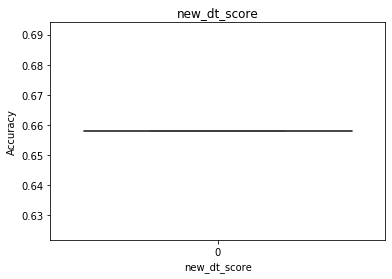

In [32]:
#Creating Boxplots for varibles

sns.boxplot(data= new_dt_score).set(title = 'new_dt_score', xlabel = 'new_dt_score', ylabel = 'Accuracy' )

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_rf_score'),
 Text(0.5, 1.0, 'new_rf_score')]

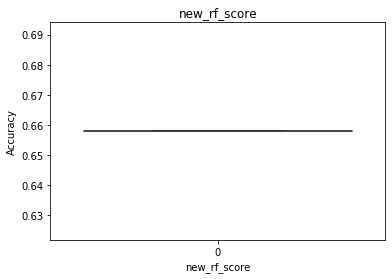

In [33]:
sns.boxplot(data= new_rf_score,dodge=True,fliersize=10).set(title = 'new_rf_score', xlabel = 'new_rf_score', ylabel = 'Accuracy' )

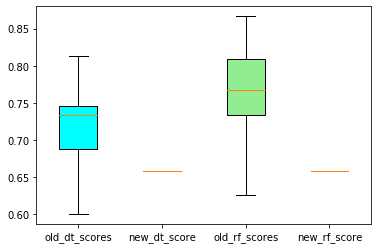

In [34]:
# BOXPLOTS COMPARISON

import matplotlib.pyplot as plt


box_plot_data=[old_dt_scores['test_score'],new_dt_score,old_rf_scores['test_score'],new_rf_score]
box=plt.boxplot(box_plot_data,vert=1,patch_artist=True,labels=['old_dt_scores','new_dt_score','old_rf_scores','new_rf_score'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

Feature ranking:
1. feature 8 (0.851118)
2. feature 5 (0.029234)
3. feature 4 (0.028210)
4. feature 0 (0.018826)
5. feature 1 (0.016398)
6. feature 7 (0.016368)
7. feature 2 (0.015434)


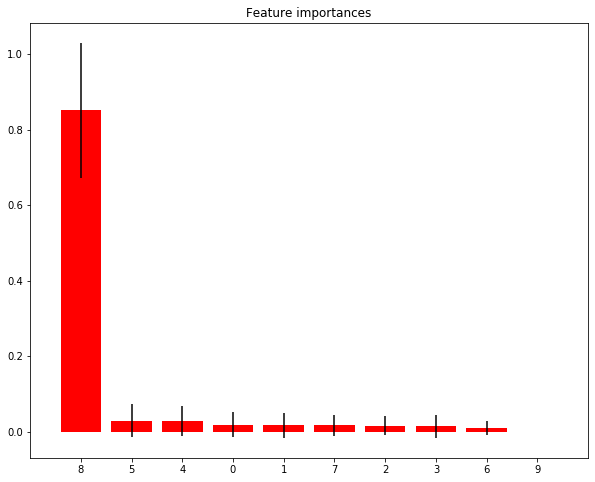

In [35]:
#selecting important features using extratreeclassifier

from sklearn.utils import resample
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
#converting to pandas dataframe
x = pd.DataFrame(x)
x.shape
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
#selecting important features using extratreeclassifier

forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(10, 8))

plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

As P-value is 0 We can reject Null Hypothesis and New Method is better than old one as Accuracies are better and not overfitted